In [1]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC

In [3]:
import pandas as pd 

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
models = []
models.append(('NBC', MultinomialNB()))
models.append(('LRC', LogisticRegression()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('LSVC', LinearSVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('ETC',ExtraTreesClassifier()))
#names = ['Review','Liked']
seed=40

In [6]:
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
x_train, x_test, y_train, y_test= train_test_split(x,y)

In [8]:
kfold = model_selection.KFold(n_splits=10,shuffle=True)

In [9]:
from imblearn.metrics import classification_report_imbalanced

In [10]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)
  model.fit(x_train, y_train)
  pred2 = model.predict(x_test)
  acc_per2 = accuracy_score(y_test,pred2)
  print('Model Accuracy : '+ str(round(acc_per2*100,4)))
  print("Recall Score :",recall_score(y_test, pred2, average='weighted'))
  print("Precision Score :",precision_score(y_test, pred2, average='weighted'))
  print("F1 Score :",f1_score(y_test, pred2, average='weighted'))
  print(classification_report_imbalanced(y_test, model.predict(x_test)))

NBC: 0.599123 (0.045341)
Model Accuracy : 59.8958
Recall Score : 0.5989583333333334
Precision Score : 0.5942518666833522
F1 Score : 0.5964684684684686
                   pre       rec       spe        f1       geo       iba       sup

          0       0.69      0.71      0.38      0.70      0.52      0.28       128
          1       0.39      0.38      0.71      0.38      0.52      0.26        64

avg / total       0.59      0.60      0.49      0.60      0.52      0.27       192



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LRC: 0.750091 (0.055483)
Model Accuracy : 80.2083
Recall Score : 0.8020833333333334
Precision Score : 0.7986111111111112
F1 Score : 0.7937675070028011
                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.91      0.58      0.86      0.73      0.55       128
          1       0.77      0.58      0.91      0.66      0.73      0.51        64

avg / total       0.80      0.80      0.69      0.79      0.73      0.53       192



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFC: 0.750060 (0.075220)
Model Accuracy : 78.125
Recall Score : 0.78125
Precision Score : 0.7762605042016807
F1 Score : 0.7772727272727273
                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.87      0.61      0.84      0.73      0.54       128
          1       0.70      0.61      0.87      0.65      0.73      0.51        64

avg / total       0.78      0.78      0.70      0.78      0.73      0.53       192



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-pa

LSVC: 0.567544 (0.140369)
Model Accuracy : 69.7917
Recall Score : 0.6979166666666666
Precision Score : 0.6779907084785134
F1 Score : 0.6574349811395672
                   pre       rec       spe        f1       geo       iba       sup

          0       0.71      0.91      0.27      0.80      0.49      0.26       128
          1       0.61      0.27      0.91      0.37      0.49      0.23        64

avg / total       0.68      0.70      0.48      0.66      0.49      0.25       192

KNN: 0.687689 (0.072091)
Model Accuracy : 78.125
Recall Score : 0.78125
Precision Score : 0.7782828282828284
F1 Score : 0.7794044665012407
                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.85      0.64      0.84      0.74      0.56       128
          1       0.68      0.64      0.85      0.66      0.74      0.53        64

avg / total       0.78      0.78      0.71      0.78      0.74      0.55       192

DTC: 0.673714 (0.076679)
Model Accuracy

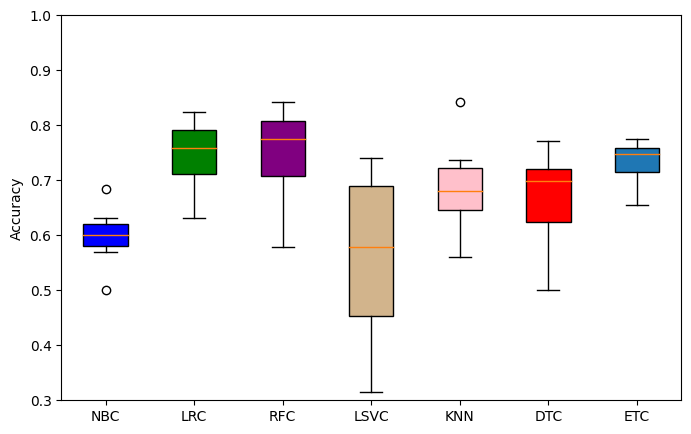

In [11]:
fig = plt.figure(figsize=(8,5))
#plt.figure(figsize=(20,10))
#fig.suptitle('ML technique Performance before sampling')
ax = fig.add_subplot(111)
#props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkBlue", caps="Gray")
box = plt.boxplot(results, patch_artist=True)
 
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
#plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim(0.3,1)
plt.ylabel('Accuracy')
plt.show()

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)
x_train,x_test,y_train,y_test=train_test_split(x_res, y_res,test_size=0.20,random_state=0)

In [14]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)
  model.fit(x_train, y_train)
  pred2 = model.predict(x_test)
  acc_per2 = accuracy_score(y_test,pred2)
  print('Model Accuracy : '+ str(round(acc_per2*100,4)))
  print("Recall Score :",recall_score(y_test, pred2, average='weighted'))
  print("Precision Score :",precision_score(y_test, pred2, average='weighted'))
  print("F1 Score :",f1_score(y_test, pred2, average='weighted'))
  print(classification_report_imbalanced(y_test, model.predict(x_test)))

NBC: 0.567500 (0.039211)
Model Accuracy : 60.5
Recall Score : 0.605
Precision Score : 0.6041193181818182
F1 Score : 0.6038163229331923
                   pre       rec       spe        f1       geo       iba       sup

          0       0.62      0.66      0.55      0.64      0.60      0.36       105
          1       0.59      0.55      0.66      0.57      0.60      0.36        95

avg / total       0.60      0.60      0.60      0.60      0.60      0.36       200



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LRC: 0.737500 (0.050312)
Model Accuracy : 76.0
Recall Score : 0.76
Precision Score : 0.760218645611904
F1 Score : 0.7594202898550725
                   pre       rec       spe        f1       geo       iba       sup

          0       0.76      0.80      0.72      0.78      0.76      0.58       105
          1       0.76      0.72      0.80      0.74      0.76      0.57        95

avg / total       0.76      0.76      0.76      0.76      0.76      0.57       200

RFC: 0.817500 (0.033634)
Model Accuracy : 81.0
Recall Score : 0.81
Precision Score : 0.8140601503759399
F1 Score : 0.81
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.77      0.85      0.81      0.81      0.65       105
          1       0.77      0.85      0.77      0.81      0.81      0.66        95

avg / total       0.81      0.81      0.81      0.81      0.81      0.66       200



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-pa

LSVC: 0.572500 (0.077015)
Model Accuracy : 64.5
Recall Score : 0.645
Precision Score : 0.6500824175824175
F1 Score : 0.6369890393294648
                   pre       rec       spe        f1       geo       iba       sup

          0       0.63      0.78      0.49      0.70      0.62      0.40       105
          1       0.67      0.49      0.78      0.57      0.62      0.38        95

avg / total       0.65      0.65      0.63      0.64      0.62      0.39       200



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNN: 0.726250 (0.033750)
Model Accuracy : 72.5
Recall Score : 0.725
Precision Score : 0.7432291666666666
F1 Score : 0.7224072910119422
                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.62      0.84      0.70      0.72      0.51       105
          1       0.67      0.84      0.62      0.74      0.72      0.53        95

avg / total       0.74      0.72      0.74      0.72      0.72      0.52       200

DTC: 0.753750 (0.034483)
Model Accuracy : 80.0
Recall Score : 0.8
Precision Score : 0.8011392533821585
F1 Score : 0.7992741203750379
                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.85      0.75      0.82      0.80      0.64       105
          1       0.82      0.75      0.85      0.78      0.80      0.63        95

avg / total       0.80      0.80      0.79      0.80      0.80      0.63       200

ETC: 0.801250 (0.039310)
Model Accuracy : 85.0
Recall Score : 

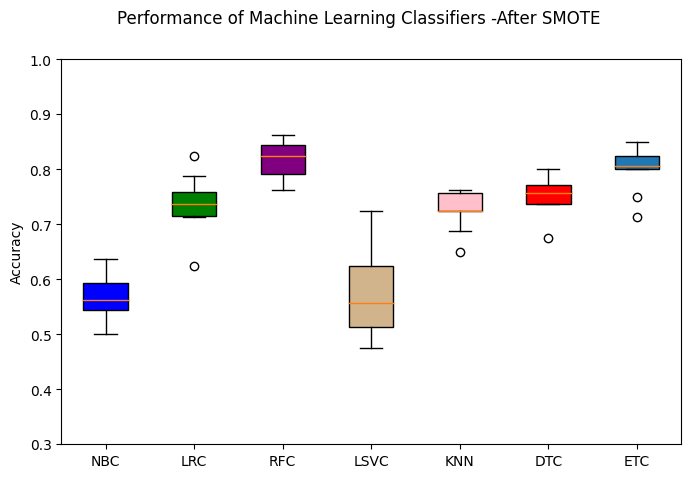

In [15]:
fig = plt.figure(figsize=(8,5))
#plt.figure(figsize=(20,10))
fig.suptitle('Performance of Machine Learning Classifiers -After SMOTE ')
ax = fig.add_subplot(111)
#props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkBlue", caps="Gray")
box = plt.boxplot(results, patch_artist=True)
 
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
#plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim(0.3,1)
plt.ylabel('Accuracy')
plt.show()

In [16]:
from imblearn.over_sampling import SMOTENC

In [17]:
sm = SMOTENC(random_state=42, categorical_features=[0, 6])
x_res, y_res = sm.fit_resample(x, y)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_res, y_res,test_size=0.20,random_state=0)

In [19]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)
  model.fit(x_train, y_train)
  pred2 = model.predict(x_test)
  acc_per2 = accuracy_score(y_test,pred2)
  print('Model Accuracy : '+ str(round(acc_per2*100,4)))
  print("Recall Score :",recall_score(y_test, pred2, average='weighted'))
  print("Precision Score :",precision_score(y_test, pred2, average='weighted'))
  print("F1 Score :",f1_score(y_test, pred2, average='weighted'))
  print(classification_report_imbalanced(y_test, model.predict(x_test)))

NBC: 0.570000 (0.037165)
Model Accuracy : 60.5
Recall Score : 0.605
Precision Score : 0.6041193181818182
F1 Score : 0.6038163229331923
                   pre       rec       spe        f1       geo       iba       sup

          0       0.62      0.66      0.55      0.64      0.60      0.36       105
          1       0.59      0.55      0.66      0.57      0.60      0.36        95

avg / total       0.60      0.60      0.60      0.60      0.60      0.36       200



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LRC: 0.747500 (0.034821)
Model Accuracy : 75.5
Recall Score : 0.755
Precision Score : 0.7555972388955583
F1 Score : 0.7551287827588797
                   pre       rec       spe        f1       geo       iba       sup

          0       0.77      0.75      0.76      0.76      0.76      0.57       105
          1       0.73      0.76      0.75      0.75      0.76      0.57        95

avg / total       0.76      0.76      0.76      0.76      0.76      0.57       200

RFC: 0.801250 (0.035111)
Model Accuracy : 82.5
Recall Score : 0.825
Precision Score : 0.8272058823529411
F1 Score : 0.8250918956765273
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.80      0.85      0.83      0.83      0.68       105
          1       0.79      0.85      0.80      0.82      0.83      0.69        95

avg / total       0.83      0.82      0.83      0.83      0.83      0.68       200



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-pa

LSVC: 0.596250 (0.064238)
Model Accuracy : 54.5
Recall Score : 0.545
Precision Score : 0.6772766323024055
F1 Score : 0.4122470942746449
                   pre       rec       spe        f1       geo       iba       sup

          0       0.54      0.99      0.05      0.70      0.23      0.06       105
          1       0.83      0.05      0.99      0.10      0.23      0.05        95

avg / total       0.68      0.55      0.50      0.41      0.23      0.05       200



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNN: 0.726250 (0.025280)
Model Accuracy : 72.0
Recall Score : 0.72
Precision Score : 0.7341365461847389
F1 Score : 0.7181453231633881
                   pre       rec       spe        f1       geo       iba       sup

          0       0.80      0.63      0.82      0.70      0.72      0.51       105
          1       0.67      0.82      0.63      0.74      0.72      0.53        95

avg / total       0.73      0.72      0.73      0.72      0.72      0.52       200

DTC: 0.726250 (0.051067)
Model Accuracy : 75.5
Recall Score : 0.755
Precision Score : 0.7548611111111111
F1 Score : 0.7547601114709647
                   pre       rec       spe        f1       geo       iba       sup

          0       0.76      0.78      0.73      0.77      0.75      0.57       105
          1       0.75      0.73      0.78      0.74      0.75      0.56        95

avg / total       0.75      0.76      0.75      0.75      0.75      0.57       200

ETC: 0.798750 (0.033284)
Model Accuracy : 84.0
Recall Score :

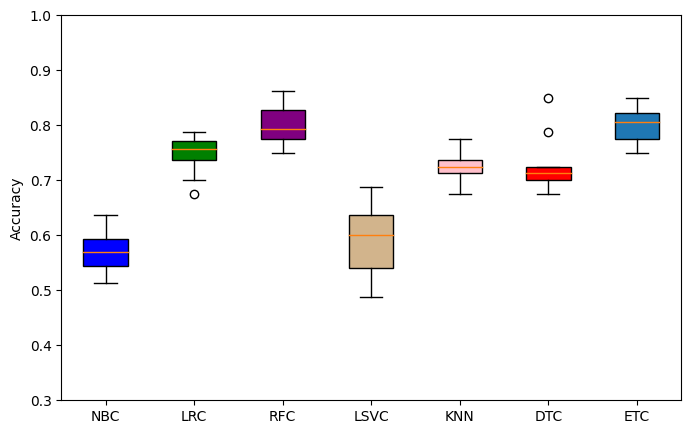

In [20]:
fig = plt.figure(figsize=(8,5))
#plt.figure(figsize=(20,10))
#fig.suptitle('Performance of Machine Learning Classifiers -After SMOTENC ')
ax = fig.add_subplot(111)
#props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkBlue", caps="Gray")
box = plt.boxplot(results, patch_artist=True)
 
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
#plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim(0.3,1)
plt.ylabel('Accuracy')
plt.show()

In [21]:
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)
x_res, y_res = sampler.fit_resample(x, y)
x_train,x_test,y_train,y_test=train_test_split(x_res, y_res,test_size=0.20,random_state=0)

In [22]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)
  model.fit(x_train, y_train)
  pred2 = model.predict(x_test)
  acc_per2 = accuracy_score(y_test,pred2)
  print('Model Accuracy : '+ str(round(acc_per2*100,4)))
  print("Recall Score :",recall_score(y_test, pred2, average='weighted'))
  print("Precision Score :",precision_score(y_test, pred2, average='weighted'))
  print("F1 Score :",f1_score(y_test, pred2, average='weighted'))
  print(classification_report_imbalanced(y_test, model.predict(x_test)))

NBC: 0.606250 (0.061555)
Model Accuracy : 61.5
Recall Score : 0.615
Precision Score : 0.6145229468599034
F1 Score : 0.6146230323115163
                   pre       rec       spe        f1       geo       iba       sup

          0       0.63      0.65      0.58      0.64      0.61      0.38       105
          1       0.60      0.58      0.65      0.59      0.61      0.37        95

avg / total       0.61      0.61      0.61      0.61      0.61      0.38       200



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LRC: 0.675000 (0.063738)
Model Accuracy : 68.0
Recall Score : 0.68
Precision Score : 0.680392353117806
F1 Score : 0.6801282051282053
                   pre       rec       spe        f1       geo       iba       sup

          0       0.70      0.69      0.67      0.69      0.68      0.46       105
          1       0.66      0.67      0.69      0.67      0.68      0.46        95

avg / total       0.68      0.68      0.68      0.68      0.68      0.46       200



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFC: 0.777500 (0.035267)
Model Accuracy : 82.0
Recall Score : 0.82
Precision Score : 0.8257160084413627
F1 Score : 0.8198919891989199
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.77      0.87      0.82      0.82      0.67       105
          1       0.78      0.87      0.77      0.82      0.82      0.68        95

avg / total       0.83      0.82      0.83      0.82      0.82      0.67       200



c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abish\AppData\Local\Programs\Python\Python310\lib\site-pa

LSVC: 0.536250 (0.044878)
Model Accuracy : 56.5
Recall Score : 0.565
Precision Score : 0.6611175115207374
F1 Score : 0.4639127967464296
                   pre       rec       spe        f1       geo       iba       sup

          0       0.55      0.97      0.12      0.70      0.34      0.12       105
          1       0.79      0.12      0.97      0.20      0.34      0.10        95

avg / total       0.66      0.56      0.52      0.46      0.34      0.11       200

KNN: 0.705000 (0.036315)
Model Accuracy : 68.5
Recall Score : 0.685
Precision Score : 0.6902073268921094
F1 Score : 0.6846928058813233
                   pre       rec       spe        f1       geo       iba       sup

          0       0.73      0.64      0.74      0.68      0.69      0.47       105
          1       0.65      0.74      0.64      0.69      0.69      0.47        95

avg / total       0.69      0.69      0.69      0.68      0.69      0.47       200

DTC: 0.701250 (0.047582)
Model Accuracy : 74.5
Recall Score

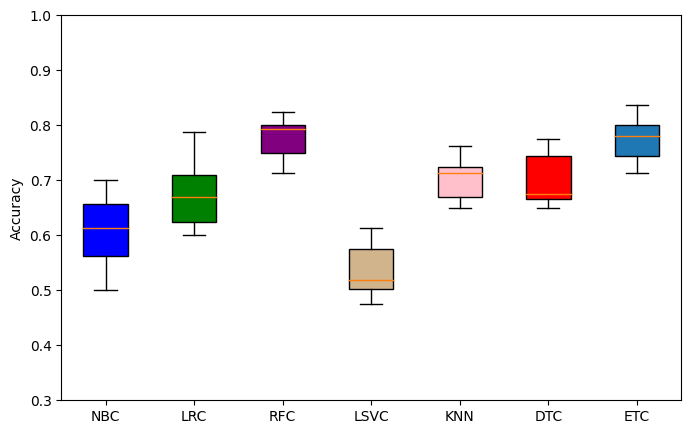

In [23]:
fig = plt.figure(figsize=(8,5))
#plt.figure(figsize=(20,10))
#fig.suptitle('Performance of Machine Learning Classifiers -After SMOTEN ')
ax = fig.add_subplot(111)
#props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkBlue", caps="Gray")
box = plt.boxplot(results, patch_artist=True)
 
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
#plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim(0.3,1)
plt.ylabel('Accuracy')
plt.show()

In [24]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
x_res, y_res = sme.fit_resample(x, y)
x_train,x_test,y_train,y_test=train_test_split(x_res, y_res,test_size=0.20,random_state=0)